In [1]:
!pip3 install git+https://github.com/kmike/pymorphy2

  Cloning https://github.com/kmike/pymorphy2 to /tmp/pip-req-build-ru3epf5w
  Running command git clone -q https://github.com/kmike/pymorphy2 /tmp/pip-req-build-ru3epf5w
     |████████████████████████████████| 8.0MB 3.9MB/s 
  Created wheel for pymorphy2: filename=pymorphy2-0.9.1-cp36-none-any.whl size=55246 sha256=5de6b3d40043d2794a950151b4d3d3ae127207390564cb1472568d2c2f83c4cb
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdylielb/wheels/03/bf/ee/4aec6da72e687a9650a660f90c6c90d815765ba868cfb2b406
Successfully built pymorphy2


In [2]:
!pip3 install --user 'lxml<4.2.0'

     |████████████████████████████████| 5.6MB 2.7MB/s 


In [3]:
!git clone https://github.com/kmike/pymorphy2-dicts

Cloning into 'pymorphy2-dicts'...
remote: Enumerating objects: 133, done.
remote: Total 133 (delta 0), reused 0 (delta 0), pack-reused 133
Receiving objects: 100% (133/133), 22.27 KiB | 4.45 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [4]:
!wget http://opencorpora.org/files/export/dict/dict.opcorpora.xml.bz2

--2020-09-30 06:16:12--  http://opencorpora.org/files/export/dict/dict.opcorpora.xml.bz2
Resolving opencorpora.org (opencorpora.org)... 148.251.2.141
Connecting to opencorpora.org (opencorpora.org)|148.251.2.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16959343 (16M) [application/x-bzip2]
Saving to: ‘dict.opcorpora.xml.bz2’

dict.opcorpora.xml. 100%[===================>]  16.17M  12.9MB/s    in 1.3s    

2020-09-30 06:16:13 (12.9 MB/s) - ‘dict.opcorpora.xml.bz2’ saved [16959343/16959343]



In [5]:
!bzip2 -dk dict.opcorpora.xml.bz2

In [6]:
!python3 build-dict.py dict.opcorpora.xml data

python3: can't open file 'build-dict.py': [Errno 2] No such file or directory


In [7]:
!pip install transformers

     |████████████████████████████████| 1.1MB 2.7MB/s 
     |████████████████████████████████| 3.0MB 17.3MB/s 
     |████████████████████████████████| 890kB 33.1MB/s 
     |████████████████████████████████| 1.1MB 39.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=07176b1211b4053889f654fc9e98812e23eb5299b5737f21d69a6e1358b8e62f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [8]:
import datetime
import time
import re
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
import pickle
from lightgbm import LGBMClassifier
from keras.layers import Activation, Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D
from keras import Sequential
from collections import Counter
from tensorflow.keras import utils

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, log_loss

from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split as tt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
import torch
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.sequence import pad_sequences
import pymorphy2
import networkx as nx

In [9]:
from collections import defaultdict, Counter
import random
#from tqdm.notebook import tqdm
#from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
#from sklearn.decomposition import LatentDirichletAllocation

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, MaxPooling1D, AveragePooling1D, Conv1D
from tensorflow.keras.layers import Flatten, Reshape, Concatenate, Permute, Activation, Dropout, multiply
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.losses import cosine_similarity
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K
import tensorflow as tf

import os

In [10]:
def vectorizer(text, vectorizer, ngram_range, max_features, min_df, max_df):

  if vectorizer == 'tf_idf':
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features, min_df=min_df, max_df=max_df)

  if vectorizer == 'count_vectorizer':
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features, min_df=min_df, max_df=max_df)


  X = vectorizer.fit_transform(text)

  return X

In [11]:
!pip install gensim

In [22]:
import gensim.downloader as api
import gensim
#model_t = api.load('ruscorpora_1_300_10.bin.gz', binary=True)
model_t = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [19]:
#model = gensim.models.KeyedVectors.load_word2vec_format('ruscorpora_1_300_10.bin.gz', binary=True)
#for n in model.most_similar(positive=[u'пожар_NOUN']):
#    print n[0], n[1]

In [25]:
model_t.get_vector('russia')

KeyError: ignored

In [44]:
APIKEY = getpass.getpass()

··········


In [46]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 962kB 8.7MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
     |████████████████████████████████| 102kB 8.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=8beefc3c0ec1e5863d551ab6d7ca7f02224a60b86ecb1fd5257f52a6034d7113
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=f1072896f9569f09aa696f1625a2e90b96862f167ebd76c95b42c51f85b453c2
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [48]:
from googletrans import Translator
translator = Translator()

In [62]:
text = []
for word in news.clean_text[0].split(' '):
  text.append(translator.translate(word, dest='en').text)

In [68]:
"""Translates text into the target language.

Target must be an ISO 639-1 language code.
See https://g.co/cloud/translate/v2/translate-reference#supported_languages
"""
from google.cloud import translate_v2 as translate

translate_client = translate.Client('en', credentials=)

if isinstance(text, six.binary_type):
    text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print(u"Text: {}".format(result["input"]))
print(u"Translation: {}".format(result["translatedText"]))
print(u"Detected source language: {}".format(result["detectedSourceLanguage"]))

DefaultCredentialsError: ignored

In [27]:
#news = pd.read_csv('https://raw.githubusercontent.com/WildArcher/Master_work/master/clean_sber_interfax_news_2018-2020.csv')
news = pd.read_csv('rbc_clean_text.csv')
#news = pd.read_csv('clean_taiga_lenta_news.csv')
#news = pd.read_csv('rbc_headers.csv')
#news.columns = ['clean_text', 'date']
#news = pd.read_csv('clean_tass_news.csv')
#news = pd.read_csv('https://raw.githubusercontent.com/WildArcher/Master_work/master/clean_interfax_news_from_Evgeniy.csv')

In [29]:
#news.drop(columns=['Unnamed: 0'],inplace=True)
#news.columns = ['clean_text', 'date']
news

,clean_text,date
0,сбербанк вместе весь страна готовиться праздно...,2020-04-20 00:00:00
1,итоговыи пресс конференция председатель заксоб...,2019-12-25 00:00:00
2,number_token number_token описание цель исслед...,2019-11-08 00:00:00
3,краснодар произоити возгорание ресторан бумбар...,2019-10-04 00:00:00
4,возможно прилив новыи сила правительство ощуще...,2020-01-21 00:00:00
...,...,...
16767,легендарныи фолк музыкант лауреат нобелевскии ...,2020-06-19 00:00:00
16768,фото kubannumber_token ооо региональныи консал...,2019-11-13 00:00:00
16769,контракт компания заключить ранее предложить ц...,2020-06-26 00:00:00
16770,новое дерево которыи посадить проспект киров п...,2019-09-05 00:00:00


In [ ]:
#news.columns = ['clean_text', 'date']

In [ ]:
!pip install corus

In [ ]:
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)

lenta_titles = []
lenta_data_int = []

for i in range(100_000):
  lenta_titles.append(next(records).title)
  a = re.findall('/\d{4}/\d{2}/\d{2}', next(records).url)
  lenta_data_int.append(int(a[0][1:5]) * 10_000 + int(a[0][6:8]) * 100 + int(a[0][9:11]) )

In [ ]:
lenta_headers = pd.DataFrame(columns=['header', 'date_int'])

lenta_headers['header'] = lenta_titles
lenta_headers['date_int'] = lenta_data_int

In [ ]:
nltk.download('stopwords') # стоп слова русского языка

stop_words = stopwords.words(('russian'))

stop_words.remove('нет')
stop_words.remove('не')
stop_words.remove('ни')

for i in range(len(stop_words)):
 stop_words[i] = ' '+stop_words[i]+' '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def tex_preprocessing(text, lemmatize, replacement, del_stop_words, no_connection, del_word_less_2_symbol):

  data = []

  for i in range(text.shape[0]):

    d = text[i]
    d = d.lower() # приведение к нижнему регистру
    d = re.sub(r'https://[a-z1-9./]+', ' ', d) # удаление ссылок

    d = re.sub('[^a-zа-я]', ' ', d) # удаление символов кроме символов русского и английского алфавитов

    if lemmatize == True:
      d = " ".join(morph.parse(word)[0].normal_form for word in d.split()) # Лемматизация

    d = re.sub(' нет ', ' не ', d) # Замена 'нет' и 'ни' на 'не'
    d = re.sub(' ни ', ' не ', d)
    #d = re.sub(r'\d+', 'number_token', d) # Замена чисел на number_token

    if replacement == True:
      d = re.sub('ё', 'е', d)
      d = re.sub('й', 'и', d)

    if del_stop_words == True:
      for stop_word in stop_words:
        if stop_word in d:
          d = re.sub(stop_word, ' ', d) # удаление стоп слов      

    if no_connection == True:
      words = d.split()
      for i in range(len(words)-1):
          if words[i] == ' не ':
            words[i] = words[i] + words[i+1]
            words[i+1] = ' '
          else:
            d = ' '.join(words)
            d = ' '.join(d.split())

    if del_word_less_2_symbol == True:
      d = " ".join([w for w in d.split() if len(w) > 2])

    data.append(d)

  return data

In [ ]:
#headers = pd.read_csv('rbc_headers.csv').title

In [ ]:
headers = tex_preprocessing(text=lenta_headers.header, lemmatize=True, replacement=True, del_stop_words=True, no_connection=True, del_word_less_2_symbol=True)

In [ ]:
lenta_headers['header'] = headers
lenta_headers['date_int'] = lenta_data_int

In [ ]:
news = lenta_headers

## Simple test

In [69]:
def preprocessing_sber_data(sber):
  sber.columns=['date', 'time', 'open', 'high', 'low', 'close', 'vol']
  sber.time /= 10_000

  year, month, day = [], [], []
  for i in range(sber.shape[0]):
    year.append(time.strptime(str(sber.date[i]), '%Y%m%d')[0])
    month.append(time.strptime(str(sber.date[i]), '%Y%m%d')[1])
    day.append(time.strptime(str(sber.date[i]), '%Y%m%d')[2])

  sber['year'] = year
  sber['month'] = month
  sber['day'] = day

  sber.drop(columns=['date'], inplace=True)

  return sber

In [153]:
#sber_day = preprocessing_sber_data(pd.read_csv('https://raw.githubusercontent.com/WildArcher/Master_work/master/prices/SBER_2010-2020.csv', sep=' '))
#sber_day = preprocessing_sber_data(pd.read_csv('https://raw.githubusercontent.com/WildArcher/Master_work/master/prices/RTSI_100617_200818.csv', sep=' '))
sber_day = preprocessing_sber_data(pd.read_csv('https://raw.githubusercontent.com/WildArcher/Master_work/master/prices/IMOEX_100617_200818.csv', sep=' ')) # Пробую индекс мос биржи

In [71]:
sber_day['date'] = np.zeros(sber_day.shape[0])

for i in range(sber_day.shape[0]): 
  sber_day['date'][i] = datetime.datetime(sber_day.year[i], sber_day.month[i], sber_day.day[i])

In [72]:
sber_day

,time,open,high,low,close,vol,year,month,day,date
0,0.0,1401.73,1425.81,1387.13,1400.66,519576185,2010,6,17,2010-06-17 00:00:00
1,0.0,1400.66,1413.52,1393.06,1409.43,419915120,2010,6,18,2010-06-18 00:00:00
2,0.0,1410.46,1458.90,1409.00,1457.95,572458884,2010,6,21,2010-06-21 00:00:00
3,0.0,1457.95,1457.95,1423.53,1434.93,491580358,2010,6,22,2010-06-22 00:00:00
4,0.0,1434.78,1436.17,1413.25,1418.42,392651292,2010,6,23,2010-06-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...
2557,0.0,1305.81,1326.13,1304.59,1326.13,1256464233,2020,8,13,2020-08-13 00:00:00
2558,0.0,1327.38,1328.14,1306.00,1323.80,853455853,2020,8,14,2020-08-14 00:00:00
2559,0.0,1328.03,1336.58,1301.03,1308.71,1125736086,2020,8,17,2020-08-17 00:00:00
2560,0.0,1306.23,1322.99,1303.30,1311.52,801422357,2020,8,18,2020-08-18 00:00:00


In [73]:
sber_day['date_int'] = np.zeros(sber_day.shape[0])

for i in range(sber_day.shape[0]):
  sber_day['date_int'][i] = int(sber_day.date[i].year)*10_000 + int(sber_day.date[i].month)*100 + int(sber_day.date[i].day)

In [74]:
news['date_int'] = np.zeros(news.shape[0])
news.date = pd.to_datetime(news.date)

for i in range(news.shape[0]):
  news['date_int'][i] = int(news.date[i].year)*10_000 + int(news.date[i].month)*100 + int(news.date[i].day)

In [75]:
news

,clean_text,date,date_int
0,сбербанк вместе весь страна готовиться праздно...,2020-04-20,20200420.0
1,итоговыи пресс конференция председатель заксоб...,2019-12-25,20191225.0
2,number_token number_token описание цель исслед...,2019-11-08,20191108.0
3,краснодар произоити возгорание ресторан бумбар...,2019-10-04,20191004.0
4,возможно прилив новыи сила правительство ощуще...,2020-01-21,20200121.0
...,...,...,...
16767,легендарныи фолк музыкант лауреат нобелевскии ...,2020-06-19,20200619.0
16768,фото kubannumber_token ооо региональныи консал...,2019-11-13,20191113.0
16769,контракт компания заключить ранее предложить ц...,2020-06-26,20200626.0
16770,новое дерево которыи посадить проспект киров п...,2019-09-05,20190905.0


In [76]:
#news['clean_text'] = news['0']

In [77]:
data = news.merge(sber_day.drop(columns=['date']))

data = data[['close', 'clean_text', 'date_int']] #'summary', 'text']]

In [78]:
data

,close,clean_text,date_int
0,1068.32,сбербанк вместе весь страна готовиться праздно...,20200420.0
1,1068.32,ректор нгуэу александр новиков какои возможнос...,20200420.0
2,1068.32,казань наблюдение врач оставаться number_token...,20200420.0
3,1068.32,предприятие среднее урал получить льготныи зае...,20200420.0
4,1068.32,эксара входить группа рэц заключить новое дого...,20200420.0
...,...,...,...
15959,1564.18,фото антон ваган интерпресс несмотря популярно...,20200103.0
15960,1341.17,управление федеральныи антимонопольныи служба ...,20190722.0
15961,1341.17,forbes опубликовать реитинг самыи богатыи бизн...,20190722.0
15962,1341.17,честь свои юбилеи день металлург завод подарит...,20190722.0


In [79]:
group_data = pd.DataFrame(data.groupby(by='date_int', as_index=False).mean(), dtype=float)

group_data

,date_int,close
0,20190626.0,1386.63
1,20190627.0,1388.07
2,20190628.0,1380.52
3,20190701.0,1401.64
4,20190702.0,1398.26
...,...,...
246,20200623.0,1281.18
247,20200625.0,1257.18
248,20200626.0,1246.74
249,20200629.0,1239.81


In [80]:
for i in range(1, 35):

  group_data['target_{}_day'.format(i)] = np.where(group_data.close.shift(-i) > group_data.close, 1, 0)


#group_data['target_2_day_stronger'] = np.where(group_data.close.shift(-2) - group_data.close.shift(-1) > group_data.close.shift(-1) - group_data.close, 1, 0)
#group_data['target_3_day_stronger'] = np.where(group_data.close.shift(-3) - group_data.close.shift(-2) > group_data.close.shift(-2) - group_data.close.shift(-1), 1, 0)

In [81]:
group_data = group_data.astype(float)

for i in range(1, 35):
  group_data['target_{}_day'.format(i)].values[-i:] = np.nan

In [82]:
data = group_data.merge(news.drop(columns=['date'])).drop_duplicates('clean_text')

In [83]:
data

,date_int,close,target_1_day,target_2_day,target_3_day,target_4_day,target_5_day,target_6_day,target_7_day,target_8_day,target_9_day,target_10_day,target_11_day,target_12_day,target_13_day,target_14_day,target_15_day,target_16_day,target_17_day,target_18_day,target_19_day,target_20_day,target_21_day,target_22_day,target_23_day,target_24_day,target_25_day,target_26_day,target_27_day,target_28_day,target_29_day,target_30_day,target_31_day,target_32_day,target_33_day,target_34_day,clean_text
0,20190626.0,1386.63,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,делегация глава роман старовоит заключить площ...
1,20190626.0,1386.63,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,депутат законодательныи собрание краснодарскии...
2,20190626.0,1386.63,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,стоимость керосин екатеринбургскии аэропорт ма...
3,20190626.0,1386.63,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,президент клуб поставить команда задача выигра...
4,20190626.0,1386.63,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,фото минобороны уголовныи дело отношение дирек...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15959,20200630.0,1212.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,обвал экономика германия сдерживаться беспреце...
15960,20200630.0,1212.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,фото саит глава определиться резидент особа эк...
15961,20200630.0,1212.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,курс валюта сегодня number_token number_token ...
15962,20200630.0,1212.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,иррико входить группа втб заключить контракт о...


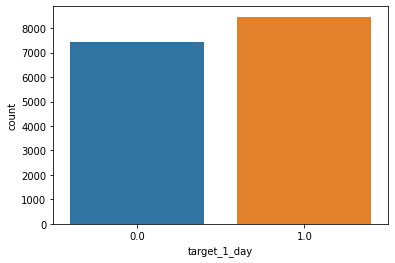

In [84]:
sns.countplot(data.target_1_day)
# Баланс классов в норме

In [85]:
#data[['date_int', 'target_10_day', 'close']][935:1005].drop_duplicates('date_int')

In [86]:
#vectorized_text = vectorizer(text=data.clean_text, vectorizer='tf_idf', ngram_range=(1, 4), max_features=5500, min_df=4, max_df=10_000)

In [87]:
#data.info()

In [88]:
data.dropna(inplace=True)

#valid_data = data[1000:]

In [89]:
# train_data, test_data, train_target, test_target = tt(vectorized_text.toarray()[:1165], data.target_10_day[:1165], test_size=0.2, shuffle=True, stratify=data.target_10_day[:1165], random_state=42)

In [90]:
def estimation_simple_model(text, target, vectorize, ngram_range, max_features, min_df, max_df):

  global train_data
  global train_target
  global test_data
  global test_target
  global vectorized_text

  vectorized_text = vectorizer(text=text, vectorizer=vectorize, ngram_range=ngram_range, max_features=max_features, min_df=min_df, max_df=max_df)

  train_data, test_data, train_target, test_target = tt(vectorized_text.toarray(), target, test_size=0.2, shuffle=False)#, random_state=42)

  global xgb_clf
  global log_reg 
  global rand_for_clf 
  global svc
  global neural_net
  global gauss
  global knn

  xgb_clf = XGBClassifier(random_state=42)
  log_reg = LogisticRegression(random_state=42)
  rand_for_clf = RandomForestClassifier(random_state=42)
  #svc = SVC(random_state=42)
  #neural_net = MLPClassifier(solver='adam', alpha=0.0001, learning_rate='constant', learning_rate_init=0.001, random_state=42)
  #knn = KNeighborsClassifier()

  print('ngram_range =', ngram_range, ', max_features =', max_features, ', min_df =', min_df, ', max_df =', max_df)
  for model in [xgb_clf, log_reg, rand_for_clf]:#, svc, neural_net, knn]:

    model.fit(train_data, train_target)
    print(str(model).split('(')[0], accuracy_score(test_target, model.predict(test_data)), '\n')

In [ ]:
#data = data.reset_index(drop=True)

In [ ]:
#data['0'][0]

In [ ]:
%%time
estimation_simple_model(data.clean_text, data.target_1_day, 'tf_idf', (1, 3), 5_000, 5, 10_000)

ngram_range = (1, 3) , max_features = 5000 , min_df = 5 , max_df = 10000
XGBClassifier 0.5048611111111111 

LogisticRegression 0.5069444444444444 

RandomForestClassifier 0.5166666666666667 

CPU times: user 2min 36s, sys: 1.09 s, total: 2min 37s
Wall time: 2min 34s


In [ ]:
# estimation_simple_model(data.clean_text[:30_000], data.target_1_day[:30_000], 'tf_idf', (1, 3), 3_500, 5, 10_000) на лете на индексе РТС 
# трейн распределен почти одинаково, предикт на трейне - почти одни 0, но качество - 63%
# на тесте распределение норм, но предсказания опять почти все 0

# estimation_simple_model(data['0'], data.target_20_day, 'tf_idf', (1, 3), 3_500, 5, 10_000)
# на новостях РБК то же самое - на трейне качество хорошее, однако на тесте - примерно 30%

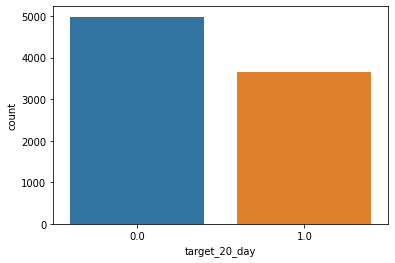

In [ ]:
sns.countplot(train_target)

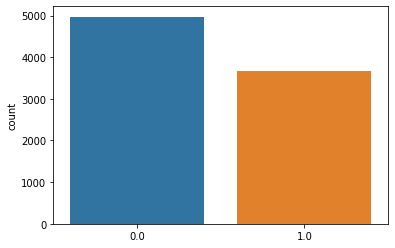

In [ ]:
sns.countplot(xgb_clf.predict(train_data))

In [ ]:
accuracy_score(train_target, xgb_clf.predict(train_data))

0.8568121310336845

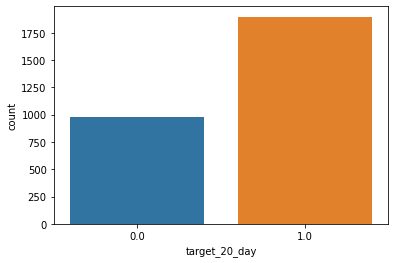

In [ ]:
sns.countplot(test_target)

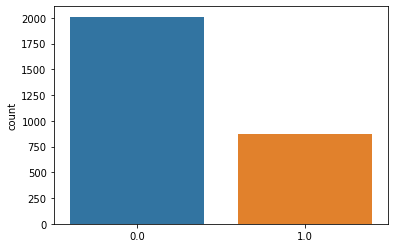

In [ ]:
sns.countplot(xgb_clf.predict(test_data))

## What data is better?

In [ ]:
#Самая ранняя версия

# Для новостей сбера 18-20, shuffle=False
#  качество 60-61% для таргета 1 дня давали:
#ngram_range = [(1, 3)]
#max_features = [6500]
#min_df = [5]
#max_df = [10_000]
# При таких же параметрах качество 63-67% было для таргет 3-4 дня
#max_features = [3500] - качество 63-65% было для таргета 5 дня, для 7 дня - максимум 70%
# для 8 дня - 5500 - 70%, дял 10 дня - 70-74%


# Для новостей Интерфакса от Евгения результат примерно 64% для перетасованных данных и 7-20 дня 

# Для большого объема новостей (рбк) тоже все работает - для 20 дня точность порядка 62% на многих моделях (макс слов - 4500)

# Для тасс 20 дня (1-3 граммы, 4000 слов - качество порядка 78% на 3-х моделях) - shuffle=True, без перемешивания - 66% (но баланс классов сильно нарушен, хотя модель предсказывает норм)
# Результат на огромном датасете Лента ру Natasha (на 30_000 новостях) 3500 слов - 64% без перемешивания для 10 дня 

In [ ]:
# Проверка:
# Для тасс 20 дня с перемешиванием результат на тесте слабо больше константного и на валидации хуже константного, трейн разбит нормально
# Для 10 дня - трейн нормально разбит, тест хуже, а валидация сравнима с константным

In [ ]:
# Тестирую новости рбк : 
# на первом таргете распределение 50/50, качество порядка 50%
# на втором - почти то же самое, результат - 52%
# на 10 дне - распределение балансное, но качество порядка 48%
# Новости тасс показали такой же плохой результат

In [ ]:
# При тесте интерфакса с перемешкой и стратификацией:
# на первом таргете на отложенной выборке и на тестовой разница с константным предсказанием очень мала
# на 10 таргете на валидации предсказание хуже константного, на тесте - лучше константного на 10-15% (связано с тем, что модель обучается и тестится на похожих словах)
#

In [ ]:
# комменты от 23 сентября

In [ ]:
# хорошо работает предсказание фасттекст на заголовках новостей рбк, на новостях рбк тоже норм (5 эпох)

In [ ]:
# estimation_simple_model(data.clean_text[:30_000], data.target_1_day[:30_000], 'tf_idf', (1, 3), 3_500, 5, 10_000) на ленте(Тайга) на индексе РТС 
# трейн распределен почти одинаково, предикт на трейне - почти одни 0, но качество - 63%
# на тесте распределение норм, но предсказания опять почти все 0
# на 

# W2V

In [48]:
data = data.reset_index(drop=True)

In [50]:
data['clean_text'] = data['0']

In [51]:
l = []

for i in range(data.shape[0]):
  l.append([word for word in data.clean_text[i].split(' ')])

In [53]:
from gensim.models import Word2Vec
import keras
from keras.preprocessing.sequence import pad_sequences

N = 300
model = Word2Vec(l, size=N, min_count=1, window=8).wv

In [54]:
model.vectors.shape

(66982, 300)

In [55]:
model.get_vector('русало')

array([ 1.29164934e-01,  3.68825905e-02, -1.14855357e-01, -1.62060559e-01,
        1.70408159e-01, -1.45894989e-01,  1.65330708e-01,  5.77724800e-02,
       -6.98394105e-02, -1.80611670e-01, -3.18777151e-02,  1.93597451e-01,
        4.37885784e-02, -2.00343519e-01, -4.14212972e-01,  3.50674777e-03,
       -2.14522421e-01, -6.11795038e-02, -1.56337693e-01, -3.49338586e-03,
        8.00689608e-02, -1.40117835e-02,  1.21070370e-02, -4.75752205e-02,
        2.47050315e-01, -1.00158058e-01, -1.53683409e-01, -4.24587391e-02,
        1.48270875e-01,  1.75615862e-01, -2.72548366e-02, -1.03641100e-01,
       -1.08558424e-01, -2.17702165e-01,  6.30449355e-02, -3.31403494e-01,
       -2.13869780e-01,  2.21657857e-01, -3.51755232e-01, -1.17719568e-01,
       -3.55432063e-01,  7.09610432e-03, -2.29319990e-01, -3.30958515e-01,
       -1.33849651e-01,  8.44223946e-02,  1.54032381e-02,  3.02735716e-01,
       -2.45368890e-02,  2.61545837e-01,  2.33184412e-01,  1.45798922e-01,
        8.70343000e-02,  

In [ ]:
data_W2V = []
N = 500
array_of_news = np.zeros((13355, 32_000))

for i in range(data.shape[0]):

  sent = []

  for word in data.clean_text[i].split(' '):
    sent.append(model.get_vector(word))

  sent = np.array(sent).reshape(-1, )

  #a = np.zeros(N*64)

  #if len(sent) < len(a):
  #  for j in range(len(sent)):
  #    a[j] = sent[j]
  #else:
  #  for j in range(len(a)):
  #    a[j] = sent[j] 

  if len(sent) < array_of_news.shape[1]:
      for k in range(len(sent)):
        array_of_news[i][k] = sent[k]
  else:
      for k in range(array_of_news.shape[1]):
        array_of_news[i][k] = sent[k]

  #data_W2V.append(a)

In [ ]:
import gc
del array_of_news
gc.collect()

In [ ]:
array_of_news

array([[-0.02791302, -0.19578947, -0.50463802, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.22271991,  1.0721848 , -2.13204813, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48773438,  0.56024337, -0.12099402, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.98276877,  0.16228528,  3.02048111, ..., -0.9470427 ,
         0.20382388, -1.00551689],
       [ 0.18723312,  0.90749156,  1.74093974, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12911129, -0.78732294, -0.27325606, ...,  1.0326798 ,
         1.76868153,  0.63221711]])

In [ ]:
pd.DataFrame(array_of_news).to_csv('array_of_news.csv', index=False)

In [ ]:
xgb_clf = XGBClassifier(max_depth=3, n_estimators=100)

train_data, test_data, train_target, test_target = tt(array_of_news, data.target_1_day, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
%time
xgb_clf.fit(train_data, train_target)

In [ ]:
data['W2V'] = data_W2V

In [ ]:
data['W2V'][0].shape

In [ ]:
data.W2V[0]

In [ ]:
a = np.zeros((13355, 32_000))

In [ ]:
a = data.W2V

In [ ]:
a.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential

maxlen = 1_000*64
max_words = 10_000

model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
vectors = np.zeros(((data.shape[0], N*64)), dtype='float32')

for i in range(len(data.W2V)):
  vectors[i] = data.W2V[i] + 10

In [ ]:
train_data, test_data, train_target, test_target = tt(vectors, data.target_1_day, 
                                            shuffle=False, random_state=42, test_size=0.2)

In [ ]:
train_data[0]

In [ ]:
train_data = np.asarray(train_data).astype('float32')
#train_data = train_data.astype('float32')

In [ ]:
history = model.fit(train_data, train_target, epochs=3)

In [ ]:
model.predict(test_data)

## Pre-Trained W2V

In [109]:
from gensim.models import word2vec
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec

#model = word2vec.Word2Vec(lenta_data, size=300, window=7)
wv_from_ruscorp = KeyedVectors.load_word2vec_format("model.bin", binary=True)

In [119]:
f = open('model.txt', 'w')
f.read(1)

UnsupportedOperation: ignored

In [121]:
wv_from_ruscorp.most_similar('россия_NOUN')

[('364,4_NUM', 0.38748329877853394),
 ('почта@mail.ru_X', 0.38153666257858276),
 ('370,2_NUM', 0.37423014640808105),
 ('сноуборд_PROPN', 0.35446494817733765),
 ('джанфранко::каспера_PROPN', 0.3465493321418762),
 ('плешакова*_X', 0.34459662437438965),
 ('суммарный_ADV', 0.33686959743499756),
 ('riff_NOUN', 0.3363485336303711),
 ('фиса_PROPN', 0.3349968194961548),
 ('чувашавтодор_PROPN', 0.33470964431762695)]

In [146]:
import nltk
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.


True

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [152]:
tokens = nltk.word_tokenize(news.clean_text[0])
nltk.pos_tag(tokens, lang = 'rus')

[('сбербанк', 'V'),
 ('вместе', 'ADV'),
 ('весь', 'A-PRO=m'),
 ('страна', 'S'),
 ('готовиться', 'V'),
 ('празднование', 'S'),
 ('number_token', 'NONLEX'),
 ('годовщина', 'S'),
 ('победа', 'S'),
 ('великии', 'S'),
 ('отечественныи', 'S'),
 ('воина', 'S'),
 ('вместе', 'ADV'),
 ('свои', 'A-PRO=pl'),
 ('дочернии', 'S'),
 ('компания', 'S'),
 ('разработать', 'V'),
 ('целыи', 'S'),
 ('ряд', 'S'),
 ('продукт', 'S'),
 ('сервис', 'S'),
 ('мероприятие', 'S'),
 ('которыи', 'S'),
 ('помочь', 'V'),
 ('весь', 'A-PRO=m'),
 ('россиянин', 'S'),
 ('оказать', 'V'),
 ('поддержка', 'S'),
 ('ветеран', 'S'),
 ('великии', 'V'),
 ('отечественныи', 'S'),
 ('воина', 'S'),
 ('почтить', 'V'),
 ('память', 'S'),
 ('свои', 'A-PRO=pl'),
 ('родные', 'A=pl'),
 ('близкие', 'A=pl'),
 ('вернуться', 'V'),
 ('полыи', 'V'),
 ('сражение', 'S'),
 ('фонд', 'S'),
 ('память', 'S'),
 ('поколение', 'S'),
 ('благотворительныи', 'S'),
 ('платформа', 'S'),
 ('сбербанк', 'S'),
 ('вместе', 'ADV'),
 ('благотворительныи', 'A=m'),
 ('фонд', 

In [92]:
data.shape

(13355, 37)

In [93]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [94]:
data_mean=mean_vectorizer(w2v).fit(data['0']).transform(data['0'])
print(data_mean.shape)

NameError: ignored

In [277]:
def split(train, y, ratio):
    idx = round(train.shape[0] * ratio)
    return train[:idx, :], train[idx:, :], y[:idx], y[idx:]

y = data.target_1_day
Xtr, Xval, ytr, yval = split(data_mean, y, 0.8)

In [278]:
model = Sequential()
model.add(Dense(128, input_dim=(Xtr.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [280]:
history = model.fit(Xtr, ytr,
                    batch_size=128,
                    epochs=100,
                   validation_data=(Xval, yval))

Epoch 1/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6928 - binary_accuracy: 0.5132 - val_loss: 0.6895 - val_binary_accuracy: 0.6103
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6928 - binary_accuracy: 0.5141 - val_loss: 0.6868 - val_binary_accuracy: 0.6455
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6927 - binary_accuracy: 0.5124 - val_loss: 0.6880 - val_binary_accuracy: 0.6252
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6928 - binary_accuracy: 0.5100 - val_loss: 0.6876 - val_binary_accuracy: 0.6230
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6926 - binary_accuracy: 0.5154 - val_loss: 0.6842 - val_binary_accuracy: 0.6552
Epoch 6/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6926 - binary_accuracy: 0.5146 - val_loss: 0.6898 - val_binary_accuracy: 0.6046
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - los

In [1]:
model.predict(Xval).mean()

NameError: ignored

In [282]:
accuracy_score(yval, np.where(model.predict(Xval) > 0.5, 1, 0))
# качество порядка 61% на РТС и обучение-тест 80% новостей РБК

0.6147510295769375

In [96]:
import zipfile
import os
import time
from google.colab import drive
from PIL import Image

In [99]:
drive.mount('/content/drive')

Mounted at /content/drive


In [100]:
zip_file = '/content/drive/My Drive/184.zip'

z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

print(os.listdir())

['.config', 'model.txt', 'rbc_headers.csv', 'meta.json', 'README', 'GoogleTranslateForColab-3e0d35bae1f8.json', 'pymorphy2-dicts', 'model.bin', 'rbc_clean_text.csv', 'dict.opcorpora.xml', 'dict.opcorpora.xml.bz2', 'drive', 'sample_data']


--2020-09-29 22:32:25--  https://drive.google.com/drive/u/0/folders/1kv8IwKk_iOuwj34w8nBhrNI_ghqpC5mP
Resolving drive.google.com (drive.google.com)... 108.177.112.139, 108.177.112.101, 108.177.112.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.112.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/drive/folders/1kv8IwKk_iOuwj34w8nBhrNI_ghqpC5mP [following]
--2020-09-29 22:32:25--  https://drive.google.com/drive/folders/1kv8IwKk_iOuwj34w8nBhrNI_ghqpC5mP
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/folders/1kv8IwKk_iOuwj34w8nBhrNI_ghqpC5mP&followup=https://drive.google.com/drive/folders/1kv8IwKk_iOuwj34w8nBhrNI_ghqpC5mP [following]
--2020-09-29 22:32:25--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=htt

## Fasttext

In [ ]:
!pip install fasttext

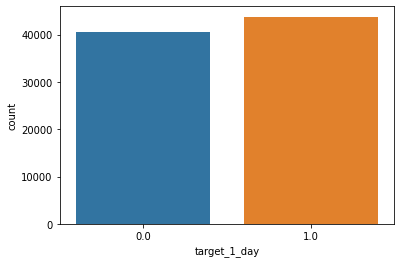

In [ ]:
sns.countplot(data.target_1_day)

In [ ]:
#data = data.reset_index(drop=True)
data.shape

(84166, 37)

In [ ]:
import fasttext
 
some_texts = list(data.header)[:10_000]
some_labels = data.target_1_day[:10_000]

df_train = pd.DataFrame({'txt': some_texts, 'target': some_labels})
df_train['target'] = df_train['target'].apply(lambda x: '__label__' + str(x))
df_train[['target', 'txt']].to_csv('train_data.txt', header=False, index=False, sep="\t")

#fasttext.cbow("train_data.txt", lr=0.05, dim=100, ws=5, epoch=5)
model = fasttext.train_supervised(input='train_data.txt', epoch=5)

In [ ]:
start = 10_001
n = 50_000

In [ ]:
pred = []

for i in range(n):
  
  pred.append(model.predict(data.header[start+i], k=1))

In [ ]:
acc = []

for i in range(n):
  if pred[i][0][0] == '__label__1.0':
    acc.append(0)
  else:
    acc.append(1)

accuracy_score(acc, data.target_1_day[start:start+n])

0.5132

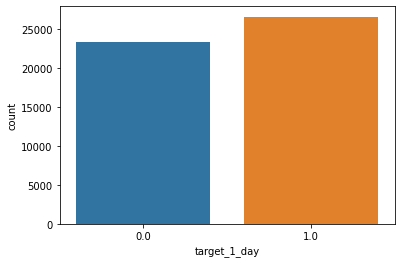

In [ ]:
sns.countplot(data.target_1_day[:50_000])

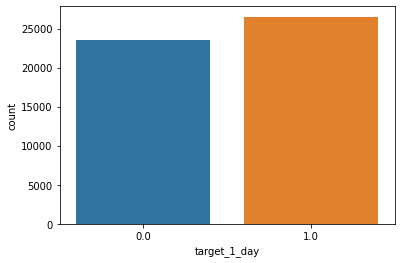

In [ ]:
sns.countplot(data.target_1_day[10_000:60_000])

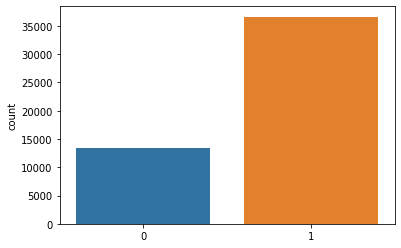

In [ ]:
sns.countplot(acc)

In [ ]:
%%time
ngram_range = [(1, 4)]
max_features = [10500]
min_df = [1]
max_df = [500]

print('Result for clean text: \n')
for i in range(len(max_df)):
  estimation_simple_model(text=data['clean_text'], 
                            target=data.target_1_day,
                            vectorize='tf_idf', ngram_range=ngram_range[0], max_features=max_features[0], min_df=min_df[0], max_df=max_df[0])

Result for clean text: 



KeyboardInterrupt: ignored

In [ ]:
# Возможно хреновое качество из-за плохой обработки текста (интерфакс от Евгения обработан не очень)
# Беру хорошо очищенный текст (интерфакс 2018-2020), макс слов - 500 (чтобы не было number_token)
# со стратификацией на трейне результат лучше константной на 8-10% на некоторых моделях
# На валидации - качество 50% - хуже константной, мешать данные точно не надо

In [ ]:
count = 0

for i in train_data[0]:
  if i != 0:
    count +=1 
  
count

In [ ]:
accuracy_score(test_target, np.zeros(len(test_target)))

In [ ]:
sns.countplot(test_target)

In [ ]:
sns.countplot(xgb_clf.predict(test_data))

In [ ]:
sns.countplot(xgb_clf.predict(vectorized_text.toarray()[1000:]))

In [ ]:
pd.DataFrame(np.hstack(((valid_data.target_1_day.values.reshape(-1, 1), xgb_clf.predict(vectorized_text.toarray()[1000:]).reshape(-1, 1)))))[:30]

In [ ]:
accuracy_score(valid_data.target_1_day.values, knn.predict(vectorized_text.toarray()[1000:]))

In [ ]:
news[news.date_int == 20181010.0].clean_text

In [ ]:
data[data.date_int == 20181010.0].clean_text

## Stacking

In [ ]:
#log_reg_3_day = log_reg.predict(test_data) # 59%

In [ ]:
#log_reg_7_day = log_reg.predict(test_data) # 60%

In [ ]:
#log_reg_10_day = log_reg.predict(test_data) # 59%

In [ ]:
#cvc_14_day = svc.predict(test_data) # 66%

In [ ]:
#log_reg_20_day = log_reg.predict(test_data) # 71%

In [ ]:
#pred = pd.DataFrame(np.hstack((log_reg_20_day.reshape(-1, 1), cvc_14_day.reshape(-1, 1), 
#                  data.date_int.values[train_data.shape[0]:train_data.shape[0]+test_data.shape[0]].reshape(-1, 1))), columns=['20_day', '14_day', 'date']).groupby('date').mean()

In [ ]:
#pred['20_day'] = pred['20_day'].shift(19)
#pred['14_day'] = pred['14_day'].shift(13)

In [ ]:
#pred.dropna(inplace=True)

#pred['all_pred'] = (pred['20_day'] + pred['10_day'] + pred['14_day'])/3

#pred['all_pred'] = np.where((pred['20_day'] + pred['14_day'])/2 > 0.5, 1, 0)

In [ ]:
#close = []

#for idx in pred.index:
#  close.append(float(sber_day.close[sber_day.date_int == idx].values))

In [ ]:
#pred['close'] = close
#pred['true'] = np.where(pred['close'].shift(-1) > pred['close'], 1, 0)
#pred

In [ ]:
prediction = np.zeros(test_data.shape[0])

for i in range(test_data.shape[0]): # Стекинг работает
    prediction[i] = rand_for_pred[i] + xgb_pred[i] + svc_pred[i]
    prediction[i] /= 3
    if prediction[i] < 0.5:
        prediction[i] = 0
    else:
        prediction[i] = 1

In [ ]:
#accuracy_score(pred.true, pred.all_pred)

In [ ]:
prediction = np.zeros(test_data.shape[0])

for i in range(test_data.shape[0]): 
    prediction[i] = log_reg_7_day[i] + cvc_14_day[i] + log_reg_20_day[i-19]
    prediction[i] /= 3
    if prediction[i] < 0.5:
        prediction[i] = 0
    else:
        prediction[i] = 1

In [ ]:
date = []

for idx in test_target.index:

  date.append(data.date_int[data.index == idx].values)


pd.DataFrame(np.hstack((xgb_clf.predict(test_data).reshape(-1, 1), test_target.values.reshape(-1, 1), 
                        np.array(date).reshape(-1, 1))),
             columns=['pred', 'true', 'date'])[:30]

In [ ]:
a = pd.DataFrame(rand_for_clf.predict(test_data), index=test_data[:, 4500])
a['close'] = test_data[:, 4501]
a

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a.index, a.close)

In [ ]:
%%time
ngram_range = [(1, 3)]
max_features = [1000]
min_df = [5]
max_df = [1_000]

print('Result for clean text: \n')
for i in range(len(max_df)):
  estimation_simple_model(text=data.clean_text, 
                            target=data.target_1_day,
                            vectorize='tf_idf', ngram_range=ngram_range[0], max_features=max_features[0], min_df=min_df[0], max_df=max_df[0])

In [ ]:
pd.Series(xgb_clf.feature_importances_).sort_values()

In [ ]:
%%time
ngram_range = [(1, 4)]
max_features = [6500]
min_df = [5]
max_df = [1_000]

print('Result for clean text: \n')
for i in range(len(ngram_range)):
  estimation_simple_model(text=data.clean_text, 
                            target=data.target_1_day, 
                            vectorize='tf_idf', ngram_range=ngram_range[i], max_features=max_features[0], min_df=min_df[0], max_df=max_df[0])

## Feature importance

In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    classes = {}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(vectorizer, log_reg, 20)

In [ ]:
importance # Выкинуть дни недели и месяцы, числа тоже

## W2V

In [ ]:
!pip install fasttext

In [ ]:
!pip install wikipedia2vec

In [ ]:
import fasttext.util
from wikipedia2vec import Wikipedia2Vec
fasttext.util.download_model('ru', if_exists='ignore')

wiki2vec = Wikipedia2Vec.load('ruwiki_20180420_300d.pkl')
ft = fasttext.load_model('cc.ru.300.bin')

In [ ]:
def vectorize(token, use_word2vec=True, use_fasttext=True):
    assert use_word2vec or use_fasttext
    if use_fasttext:
        try:
            fast_text_vector = ft.get_word_vector(token)
        except KeyError:
            fast_text_vector = np.zeros((ft.get_dimension()))

    if use_word2vec:
        try:
            word2vec_vector = wiki2vec.get_word_vector(token)
        except KeyError:
            word2vec_vector = np.zeros((len(wiki2vec.get_word_vector('the'))))

    if use_fasttext and use_word2vec:
        return np.concatenate([word2vec_vector, fast_text_vector])
    elif use_fasttext:
        return np.array(fast_text_vector)
    elif use_word2vec:
        return np.array(word2vec_vector)
    else:
        return 'something went wrong on vectorisation'

print(np.shape(vectorize('any_token')))

### LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential

maxlen = 50_000
max_words = 300_000

model = Sequential()
model.add(Embedding(max_words, 4, input_length=maxlen))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
vectorized_text = vectorizer(text=data.clean_text, vectorizer='tf_idf', ngram_range=(1, 3), max_features=5000, min_df=4, max_df=10_000)

In [ ]:
vectorized_text[:2000].shape

In [ ]:
valid_data = vectorized_text[2000:]

text = vectorized_text[:2000]

In [ ]:
train_data, test_data, train_target, test_target = tt (text, data.target_1_day.values[:2000], test_size=0.2, shuffle=False)

In [ ]:
train_data = pad_sequences(train_data.toarray(), maxlen=maxlen)
test_data = pad_sequences(test_data.toarray(), maxlen=maxlen)

In [ ]:
model.fit(train_data, 
                    train_target, 
                    epochs=2)

In [ ]:
model.predict(test_data)

In [ ]:
accuracy_score(test_target, model.predict(test_data))

### При тесте очищенных данных наилучшая модель - RandomForest, стабильно на 2-3 % лучше, лидеры:
 - ngram_range = (1, 4) , max_features = 6500 (66.5%), 5000 - чуть хуже
 - ngram_range = (1, 3) , max_features = 2000 (65.5%)
 
 min_df = 2, 5

 Средний результат лучших моделей (как правило 3 модели показывают +- одинаковый результат) для лучших параметров(для не очень хороших параметров качество около 61%) - 62.5%

In [ ]:
#rand_for_clf.predict(test_data)
# Предсказания тоже в порядке

## Random Forest tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 4, 5],
             'n_estimators' : range(100, 1000, 100)
             }

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-2), param_grid=param_grid, scoring='accuracy', cv=3)

In [ ]:
%%time
grid_search.fit(vectorized_text, data.target)

In [ ]:
grid_search.best_estimator_

In [ ]:
score = []

for i in range(100):
  best_rand_for_clf = RandomForestClassifier(max_depth=3, n_estimators=100)

  vectorized_text = vectorizer(text=data.clean_text, vectorizer='tf_idf', ngram_range=(1, 4), max_features=5000, min_df=5, max_df=100000)

  train_data, test_data, train_target, test_target = tt (vectorized_text, data.target, test_size=0.2, shuffle=False)

  best_rand_for_clf.fit(train_data, train_target)

  score.append(accuracy_score(test_target, best_rand_for_clf.predict(test_data)))

In [ ]:
np.mean(np.array(score))

In [ ]:
metrics = pd.DataFrame(index=[[str(model).split('(')[0] for model in [xgb_clf, log_reg, rand_for_clf, svc, neural_net, knn]]], columns=['accuracy', 'roc_auc', 'f1', 
                                                                                                                                        'precision', 'recall', 'log'])
vectorized_text = vectorizer(text=data.clean_text, vectorizer='tf_idf', ngram_range=(1, 3), max_features=4500, min_df=5, max_df=10000)
train_data, test_data, train_target, test_target = tt (vectorized_text, target, test_size=0.2, shuffle=False)

for model in [xgb_clf, log_reg, rand_for_clf, svc, neural_net, knn]:
  
  model.fit(train_data, train_target)

  metrics.accuracy[str(model).split('(')[0]] = accuracy_score(test_target, model.predict(test_data))
  metrics.roc_auc[str(model).split('(')[0]] = roc_auc_score(test_target, model.predict(test_data))
  metrics.f1[str(model).split('(')[0]] = f1_score(test_target, model.predict(test_data))
  metrics.precision[str(model).split('(')[0]] = precision_score(test_target, model.predict(test_data))
  metrics.recall[str(model).split('(')[0]] = recall_score(test_target, model.predict(test_data))
  metrics.log[str(model).split('(')[0]] = log_loss(test_target, model.predict(test_data))

In [ ]:
metrics

# BERT

In [ ]:
data.head()

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
for i in range(data.shape[0]): # проблема - слишком длинные новости, ее длина в среднем 2000, а для токенайзера максимум 512
# Решение - разбивать на куски длиной не более 512 (конец - конец предложения) и тональность самой новости считать как среднее из тональностей ее составляющих
   data['text'][i] =  data['text'][i][:128]

In [ ]:
tokenized = data['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
tokenized

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
train_features, test_features, train_target, test_target = tt(features, data['target'], random_state=42)
  
for model in [xgb_clf, log_reg, rand_for_clf, svc, neural_net, knn]:
  model.fit(train_features, train_target)
  print(str(model).split('(')[0], accuracy_score(test_target, model.predict(test_features)), '\n')